# <b>Bootcamp Data Analytics 2024 - Challenge Frequência e Medidas</b>

Esse desafio tem como objetivo responder algumas perguntas através da
análise de dados, aprofundando o conhecimento em frequência e medidas.
Os dados que deverão ser utilizado nesse script foram baixados do kaggle,
e podem ser acessados através do link:
https://www.kaggle.com/spscientist/students-performance-in-exams
Este conjunto de dados consiste nas notas obtidas pelos alunos em várias
disciplinas e suas informações pessoais.
Variáveis:

* gender - gênero do aluno
* race/ethnicity - raça/etnia dos alunos
* parental level of education - grau de escolaridade dos pais
* lunch - tipo de almoço
* test preparation course - indica se fez curso preparatório
* math score - nota na prova de matematica
* reading score - nota na prova de leitura
* writing score - nota na prova de escrita
Os dados são arquivos em .csv.


In [ ]:
#Importando as bibliotecas

# Manipulação de Dados
import pandas as pd
import numpy as np
from google.colab import files

# Datas
from datetime import datetime, timedelta

# Visualizações
from matplotlib import pyplot as plt
import seaborn as sns

# Estatística
import scipy.stats as stat

In [ ]:
# UPE O CSV DO STUDENTSPERFORMANCE
files.upload()

df_students = pd.read_csv ('StudentsPerformance.csv')

Saving StudentsPerformance.csv to StudentsPerformance.csv


### 1. Leia a base de dados e faça uma análise inicial, como por exemplo,verificar o tamanho da base de dados (quantidade de linhas e colunas) e o tipo das variáveis.


In [ ]:
# Versão do Python
from platform import python_version
print (python_version())

3.10.12


In [ ]:
# Conhecendo os dados
df_students.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
# Função que retorna o número de linhas e colunas em um DataFrame
def func_retorna_linhas_colunas(df):
    #return df.shape[0]
     print ("Esse DataFrame possui",df.shape[0],"linhas e", df.shape[1], "colunas.")

In [ ]:
func_retorna_linhas_colunas(df_students)

Esse DataFrame possui 1000 linhas e 8 colunas.


In [ ]:
# Analisando os tipos de variáveis e a existência de valores nulos
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Verificando valores únicos de cada coluna
# Caso a lista de valores únicos da referida coluna seja <= 30 imprime a lista, caso contrário imprime o quantitativo de valores, em razão da alta cardinalidade da coluna.

def func_colunas_valores_unicos(df):
    for col in list(df.columns):
        valores_unicos = df[col].unique()

        if len(valores_unicos) <= 30:
            print('\n' + col + ': ' + str(len(valores_unicos)) + ' valor(es) único(s).')
            print(valores_unicos)
        else:
            print('\n' + col + ': ' + str(len(valores_unicos)) + ' valor(es) único(s).')

In [ ]:
# Chamada a função que indica os valores únicos de cada coluna, de modo a analisar a eventual existência de dados indesejados
func_colunas_valores_unicos(df_students)


gender: 2 valor(es) único(s).
['female' 'male']

race/ethnicity: 5 valor(es) único(s).
['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education: 6 valor(es) único(s).
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch: 2 valor(es) único(s).
['standard' 'free/reduced']

test preparation course: 2 valor(es) único(s).
['none' 'completed']

math score: 81 valor(es) único(s).

reading score: 72 valor(es) único(s).

writing score: 77 valor(es) único(s).


In [ ]:
# Função que verifica se existe algum valor negativo nos scores dos dados dos estudantes
def fun_colunas_valores_negativos(df):
  colunas_negativas = df.columns[df.lt(0).any()]
  if len(colunas_negativas) > 0:
    print ("As seguintes colunas possuem valores negativos:")
    for c in colunas_negativas:
      print (c)
  else:
    print ("Não existe valores negativos.")


In [ ]:
# Analisando se as colunas de alta cardinalidade e númericas (scores) possuem valor negativo
df_temp = df_students.loc[:,'math score':'writing score']
df_temp

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [ ]:
# Chamada à função que analisa a existência de valores negativos
fun_colunas_valores_negativos(df_temp)

Não existe valores negativos.


In [ ]:
df_students_copia_matematica = df_students.copy()

### 2. Alguma variável precisa ser alterada ou criada? Faça as alterações se julgar necessária.


In [ ]:
# Traduzindo o nome das variáveis

df_students.columns = [['Gênero','Raça/Etnia','Grau de Escolaridade dos Pais','Tipo de Almoço','Curso Preparatório','Nota de Matematica','Nota de Leitura','Nota de Escrita']]
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   (Gênero,)                         1000 non-null   object
 1   (Raça/Etnia,)                     1000 non-null   object
 2   (Grau de Escolaridade dos Pais,)  1000 non-null   object
 3   (Tipo de Almoço,)                 1000 non-null   object
 4   (Curso Preparatório,)             1000 non-null   object
 5   (Nota de Matematica,)             1000 non-null   int64 
 6   (Nota de Leitura,)                1000 non-null   int64 
 7   (Nota de Escrita,)                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df_students.head(5)

,Gênero,Raça/Etnia,Grau de Escolaridade dos Pais,Tipo de Almoço,Curso Preparatório,Nota de Matematica,Nota de Leitura,Nota de Escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Transformando variaveis categórias para analise de Machine Learning

df_students_encoded = df_students
dummies = pd.get_dummies(df_students_encoded['Tipo de Almoço'])

In [ ]:
df_students_encoded = pd.concat([df_students_encoded,dummies],axis=1)
df_students_encoded

,"(Gênero,)","(Raça/Etnia,)","(Grau de Escolaridade dos Pais,)","(Tipo de Almoço,)","(Curso Preparatório,)","(Nota de Matematica,)","(Nota de Leitura,)","(Nota de Escrita,)","('Tipo de Almoço',)_free/reduced","('Tipo de Almoço',)_standard"
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1
1,female,group C,some college,standard,completed,69,90,88,0,1
2,female,group B,master's degree,standard,none,90,95,93,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0
4,male,group C,some college,standard,none,76,78,75,0,1
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0,1
996,male,group C,high school,free/reduced,none,62,55,55,1,0
997,female,group C,high school,free/reduced,completed,59,71,65,1,0
998,female,group D,some college,standard,completed,68,78,77,0,1


In [ ]:
df_students_copy = df_students

In [ ]:
# Criando nova variavel que armazena a média de todas as notas

df_students_copy['Média das notas'] = df_students_copy[['Nota de Matematica', 'Nota de Leitura', 'Nota de Escrita']].mean(axis=1)

In [ ]:
df_students_copy.head(3)

,Gênero,Raça/Etnia,Grau de Escolaridade dos Pais,Tipo de Almoço,Curso Preparatório,Nota de Matematica,Nota de Leitura,Nota de Escrita,Média das notas
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667


### 3. Verifique a quantidade de alunos em cada grupo racial/étnico

In [ ]:
#cálculo da quantidade de alunos por grupo racial/étnico
qtde_etnia_freq = df_students_copy['Raça/Etnia'].value_counts().rename_axis("")

#cálculo da percentual de alunos por grupo racial/étnico
qtde_etnia_perc = df_students_copy['Raça/Etnia'].value_counts(normalize =  True).rename_axis("") * 100

#tabela de frequências
dist_freq_perc = pd.DataFrame({'Frequência': qtde_etnia_freq, 'Porcentagem(%)': qtde_etnia_perc })

#nomear primeira coluna
dist_freq_perc.rename_axis('Raça/Etnia', axis = 'columns', inplace = True)

#mostrar tabela ordenada por grupo
dist_freq_perc.sort_index(ascending = True)

Raça/Etnia,Frequência,Porcentagem(%)
,,
group A,89,8.9
group B,190,19.0
group C,319,31.9
group D,262,26.2
group E,140,14.0


Análise: Na tabela acima consta a quantidade de alunos por grupo mostrando a frequência da contagem de alunos de cada grupo, além da porcentagem.

Diante disso, podemos identificar que de 1000 alunos, o grupo C se destaca quanto a sua frequência com maior número de ocorrências, e já o grupo A tem a menor frequência.

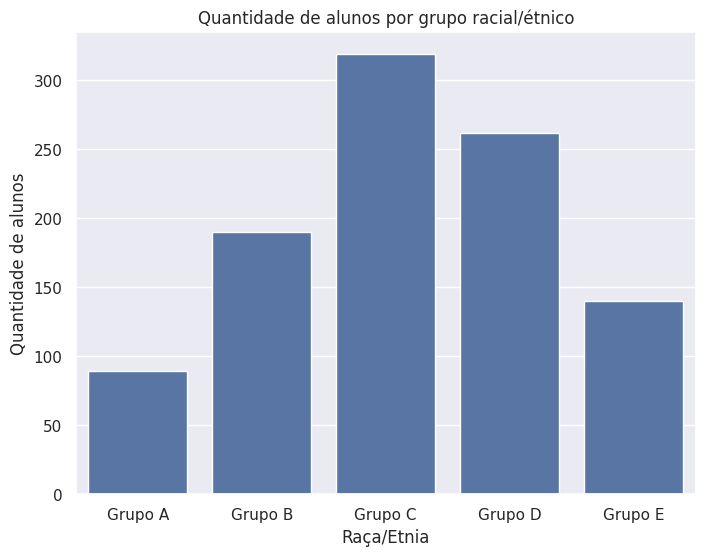

In [ ]:
#listar a quantidade de alunos por grupo
lista_qtde_alunos = qtde_etnia_freq.sort_index(ascending = True).tolist()

#listar o nome de cada grupo
lista_grupos = ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E']

#criar um dataset com grupos e suas quantidades de alunos
qtde_grupos = pd.DataFrame({'Grupos': lista_grupos, 'qtde': lista_qtde_alunos })

#estilo do gráfico
sns.set(style="darkgrid")

#gráfico comparativo da quantidade de alunos por grupo
plt.figure(figsize=(8, 6))
sns.barplot(x='Grupos', y='qtde', data=qtde_grupos).set(title='Quantidade de alunos por grupo racial/étnico')

#Ajustando labels
plt.xlabel('Raça/Etnia')
plt.ylabel('Quantidade de alunos')

plt.show()

Análise: No gráfico acima é mostrado de uma forma mais visual as quantidades de alunos de cada grupo racial/étnico.

Diante disso, podemos visualizar melhor a distribuição das quantidades, havendo uma simetria em que o ponto central é o Grupo C.

### 4. Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?

Quantidade de alunos de cada gênero:
(Gênero,)
female       518
male         482
dtype: int64
Existem mais alunos do gênero feminino.


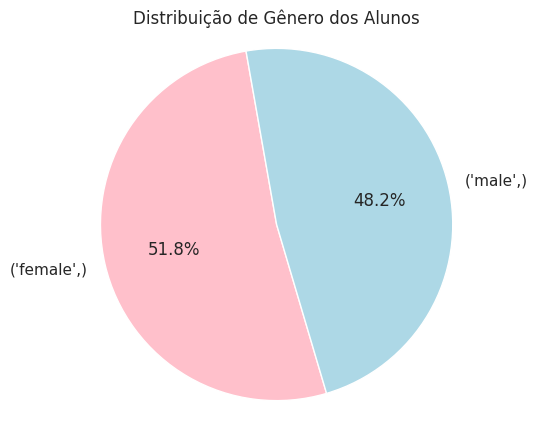

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculando a quantidade de alunos de cada gênero
quantidade_por_genero = df_students['Gênero'].value_counts()

# Imprimindo a quantidade de alunos de cada gênero
print("Quantidade de alunos de cada gênero:")
print(quantidade_por_genero)

# Verificando se existem mais alunos do gênero masculino ou feminino
if quantidade_por_genero.get('male', 0) > quantidade_por_genero.get('female', 0):
    print("Existem mais alunos do gênero masculino.")
else:
    print("Existem mais alunos do gênero feminino.")


# Gerando o gráfico de pizza
# Cria uma nova figura com tamanho 5x5 polegadas
plt.figure(figsize=(5,5))
# Gera o gráfico de pizza com os dados.
plt.pie(quantidade_por_genero,
        labels=quantidade_por_genero.index,
        autopct='%1.1f%%',
        startangle=100,
        colors=['pink', 'lightblue'])
# Adiciona um título ao gráfico
plt.title('Distribuição de Gênero dos Alunos')
#Circulo
plt.axis('equal')
# Exibe o gráfico de pizza
plt.show()

### 5. Analise as notas de matemática dos alunos de forma mais completa possível.

In [ ]:
#importação dos dados
dtframe = pd.read_csv('StudentsPerformance.csv')

#renomeação das colunas
dtframe = dtframe.rename(columns={'gender': 'Gênero', 'race/ethnicity': 'Raça/etnia', 'parental level of education': 'Escolaridade dos pais',
                                  'lunch': 'Refeição', 'test preparation course': 'Curso preparatório', 'math score': 'Nota matemática',
                                  'reading score': 'Nota leitura', 'writing score': 'Nota redação'})

#alterar o conteúdo das variáveis com descrição em inglês
#Gênero
dtframe.replace('female', 'Feminino', inplace=True)
dtframe.replace('male', 'Masculino', inplace=True)

#Etnia
dtframe.replace('group A', 'Grupo A', inplace=True)
dtframe.replace('group B', 'Grupo B', inplace=True)
dtframe.replace('group C', 'Grupo C', inplace=True)
dtframe.replace('group D', 'Grupo D', inplace=True)
dtframe.replace('group E', 'Grupo E', inplace=True)
dtframe.replace('male', 'Masculino', inplace=True)

#Escolaridade dos pais
dtframe.replace("bachelor's degree", 'Bacharelado', inplace=True)
dtframe.replace('some college', 'Superior incompleto', inplace=True)
dtframe.replace("master's degree", 'Mestrado', inplace=True)
dtframe.replace("associate's degree", 'Superior - Tecnólogo', inplace=True)
dtframe.replace('high school', 'Ensino médio completo', inplace=True)
dtframe.replace('some high school', 'Ensino médio incompleto', inplace=True)

#Almoço
dtframe.replace('standard', 'Padrão', inplace=True)
dtframe.replace('free/reduced', 'Livre/reduzida', inplace=True)

#Curso preparatório
dtframe.replace('none', 'Não fez', inplace=True)
dtframe.replace('completed', 'Completado', inplace=True)

#copiar para o dataframe de análise das notas de matemática
dtMath = dtframe[['Gênero', 'Raça/etnia', 'Escolaridade dos pais', 'Refeição', 'Curso preparatório', 'Nota matemática']].copy(deep=True)

#estatísticas descritivas com amplitude e variância
def montar_describe(df):
    df_new = df.describe()
    df_new.loc["amplitude"] = df_new.loc['max'] - df_new.loc['min']
    df_new.loc["variancia"] = df_new.loc['std'] * df_new.loc['std']
    return df_new

montar_describe(dtMath)

,Nota matemática
count,1000.000000
mean,66.089000
std,15.163080
min,0.000000
25%,57.000000
50%,66.000000
75%,77.000000
max,100.000000
amplitude,100.000000
variancia,229.918998


**MÉDIA, MODA E MEDIANA DAS NOTAS DE MATEMÁTICA**

In [ ]:
print('Média = ',dtMath['Nota matemática'].mean())
print('Mediana = ', dtMath['Nota matemática'].median())
print('Moda = ', dtMath['Nota matemática'].mode())

#agora vamos pegar as mesmas estatísticas para cada
#dfSono_por_profissao = dtFrame.groupby(by=['Profissão']).aggregate({'Duração do sono':['mean', 'median',pd.Series.mode]})

alunos_por_categoria = dtMath.groupby('Gênero').aggregate({'Nota matemática':['mean', 'median']})
print(alunos_por_categoria)

alunos_por_categoria = dtMath.groupby('Raça/etnia').aggregate({'Nota matemática':['mean', 'median']})
print(alunos_por_categoria)

alunos_por_categoria = dtMath.groupby(by=['Escolaridade dos pais']).aggregate({'Nota matemática':['mean', 'median']})
print(alunos_por_categoria)

alunos_por_categoria = dtMath.groupby('Refeição').aggregate({'Nota matemática':['mean', 'median']})
print(alunos_por_categoria)

alunos_por_categoria = dtMath.groupby('Curso preparatório').aggregate({'Nota matemática':['mean', 'median']})
print(alunos_por_categoria)

Média =  66.089
Mediana =  66.0
Moda =  0    65
Name: Nota matemática, dtype: int64
          Nota matemática       
                     mean median
Gênero                          
Feminino        63.633205   65.0
Masculino       68.728216   69.0
           Nota matemática       
                      mean median
Raça/etnia                       
Grupo A          61.629213   61.0
Grupo B          63.452632   63.0
Grupo C          64.463950   65.0
Grupo D          67.362595   69.0
Grupo E          73.821429   74.5
                        Nota matemática       
                                   mean median
Escolaridade dos pais                         
Bacharelado                   69.389831   68.0
Ensino médio completo         62.137755   63.0
Ensino médio incompleto       63.497207   65.0
Mestrado                      69.745763   73.0
Superior - Tecnólogo          67.882883   67.0
Superior incompleto           67.128319   67.5
               Nota matemática       
                  

***GRÁFICOS***

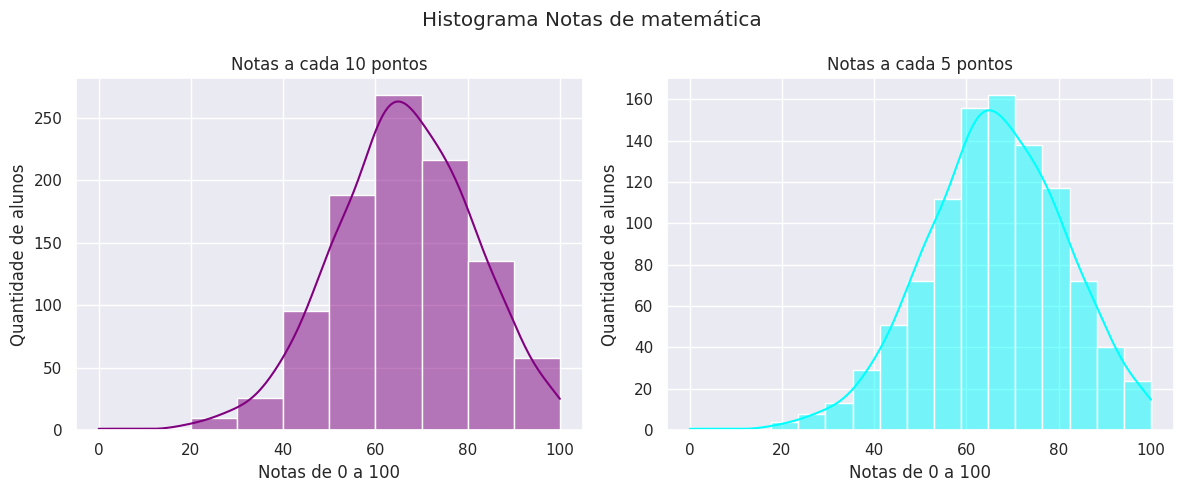

In [ ]:
# histograma geral das notas de matemática
sns.set(style="darkgrid")
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(12,5))
figure.suptitle('Histograma Notas de matemática')
axes[0].set_title('Notas a cada 10 pontos')
axes[0].set_xlabel('Notas de 0 a 100')
axes[0].set_ylabel('Quantidade de alunos')
axes[1].set_title('Notas a cada 5 pontos')
axes[1].set_xlabel('Notas de 0 a 100')
axes[1].set_ylabel('Quantidade de alunos')
sns.histplot(ax=axes[0], data=dtMath, x='Nota matemática', bins=10, kde=True, color='purple')
sns.histplot(ax=axes[1], data=dtMath, x='Nota matemática', bins=20, kde=True, color='cyan', binwidth=6)
figure.tight_layout()

**ANÁLISE DO HISTOGRAMA**: Podemos concluir que mais um quarto dos alunos (em torno de mais de 250 de um total de 1000 alunos), considerando 100 o total de pontos na nota, obteve notas entre 60 e 70 pontos, e que a maioria (mais da metade) obteve notas entre 50 e 80 pontos

**HISTOGRAMAS DE ACORDO COM CADA CATEGORIA**

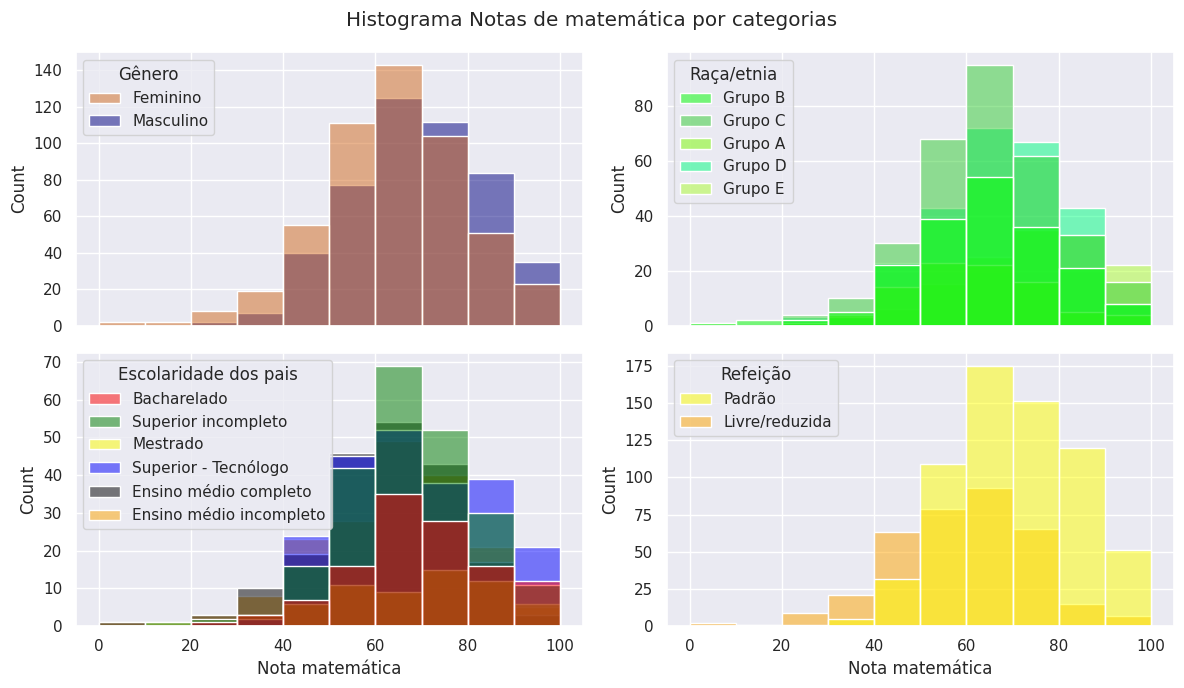

In [ ]:
sns.set(style="darkgrid")
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(12,7))
figure.suptitle('Histograma Notas de matemática por categorias')
sns.histplot(ax=axes[0,0], data=dtMath, x='Nota matemática', bins=10, hue='Gênero', palette=['chocolate', 'navy'])
sns.histplot(ax=axes[0,1], data=dtMath, x='Nota matemática', bins=10, hue='Raça/etnia', palette=['lime', 'limegreen','lawngreen','springgreen','greenyellow'])
sns.histplot(ax=axes[1,0], data=dtMath, x='Nota matemática', bins=10, hue='Escolaridade dos pais', palette=['red', 'green','yellow','blue','black','orange'])
sns.histplot(ax=axes[1,1], data=dtMath, x='Nota matemática', bins=10, hue='Refeição', palette=['yellow', 'orange'])
figure.tight_layout()

**ANÁLISE:** Quando há uma quantidade maior de categorias, histogramas podem ficar visualmente mais confusos e poluídos. Faremos agora essa análise gráfica a partir de gráficos de barra

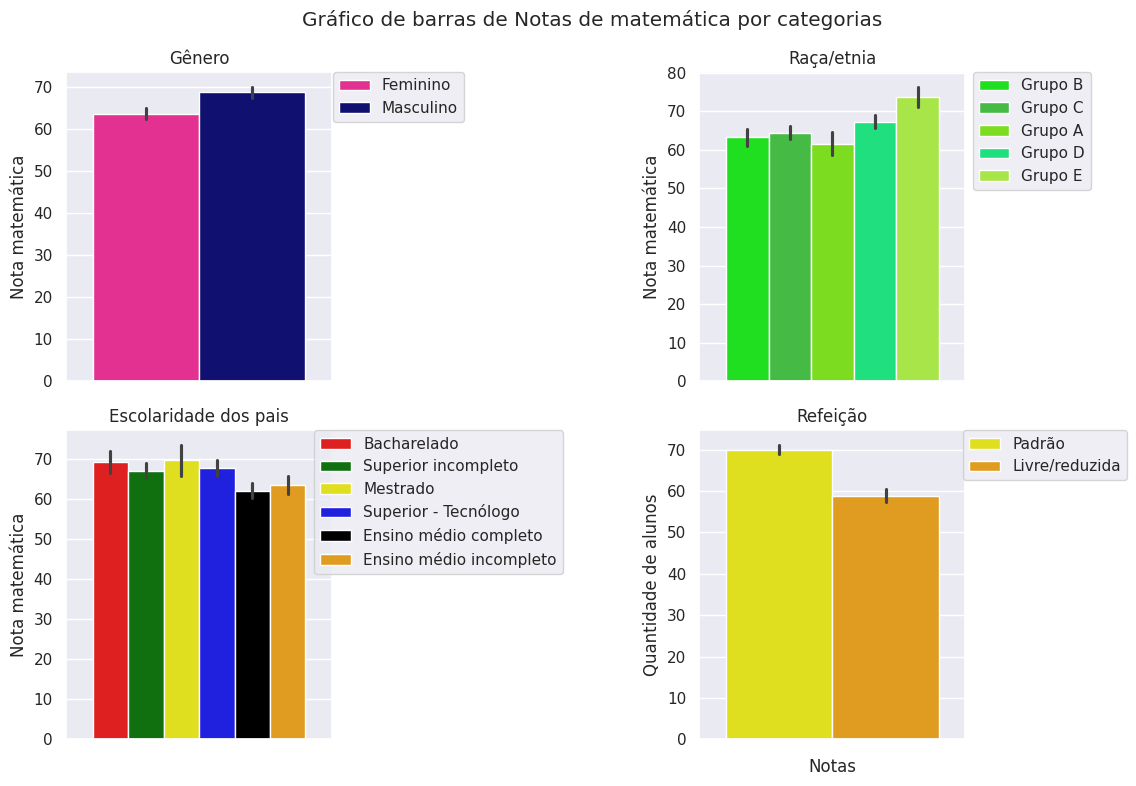

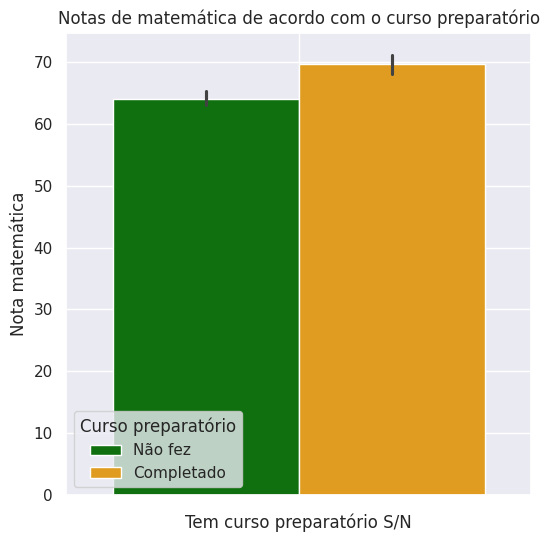

In [ ]:
sns.set(style="darkgrid")
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(12,8))
figure.suptitle('Gráfico de barras de Notas de matemática por categorias')
plt.xlabel('Notas')
plt.ylabel('Quantidade de alunos')
sns.barplot(ax=axes[0,0], data=dtMath, hue='Gênero', y='Nota matemática', palette=['deeppink', 'navy'])
sns.barplot(ax=axes[0,1], data=dtMath, hue='Raça/etnia', y='Nota matemática', palette=['lime', 'limegreen','lawngreen','springgreen','greenyellow'])
sns.barplot(ax=axes[1,0], data=dtMath, hue='Escolaridade dos pais', y='Nota matemática', palette=['red', 'green','yellow','blue','black','orange'])
sns.barplot(ax=axes[1,1], data=dtMath, hue='Refeição', y='Nota matemática', palette=['yellow', 'orange'])
axes[0,0].legend(bbox_to_anchor=(1.25, 1), loc='upper center', borderaxespad=0)
axes[0,1].legend(bbox_to_anchor=(1.25, 1), loc='upper center', borderaxespad=0)
axes[1,0].legend(bbox_to_anchor=(1.4, 1), loc='upper center', borderaxespad=0)
axes[1,1].legend(bbox_to_anchor=(1.3, 1), loc='upper center', borderaxespad=0)
axes[0,0].set_title('Gênero')
axes[0,1].set_title('Raça/etnia')
axes[1,0].set_title('Escolaridade dos pais')
axes[1,1].set_title('Refeição')
figure.tight_layout()

plt.figure(figsize=(6, 6))
sns.barplot(data=dtMath, hue='Curso preparatório', y='Nota matemática', palette=['green', 'orange'])
plt.title('Notas de matemática de acordo com o curso preparatório')
plt.xlabel('Tem curso preparatório S/N')
plt.ylabel('Nota matemática')
plt.grid(True)
plt.show()

**ANÁLISE**: Podemos concluir por esses gráficos:
- As notas do gênero masculino são ligeiramente mais altas que do feminino.
- De acordo com a etnia, o grupo E tem mais alunos com notas mais altas e no grupo A as notas são mais baixas, embora todos possuam média de pelo menos 60% de aproveitamento.
- A escolaridade dos pais destes alunos não influencia muito em suas médias, pois estão todas muito próximas, porém aqueles cujos pais possuem mestrado e bacharelado tem nota mais altas e aqueles cujos pais possuem ensino médio, um pouco mais baixas, sendo que filhos de pais que possuem faculdade incompleta e ensino médio incompleto obtiveram notas mais altas do que aqueles com ensino médio completo.
- Já no tipo de regime no qual estudam, se com oferta de almoço ou sem essa refeição (suponho que talvez sejam alunos que estudem em período integral x período parcial), a média cai pelo menos 10 pontos.
- Em relação a curso perparatório, os alunos que fizeram obtiveram notas mais altas.

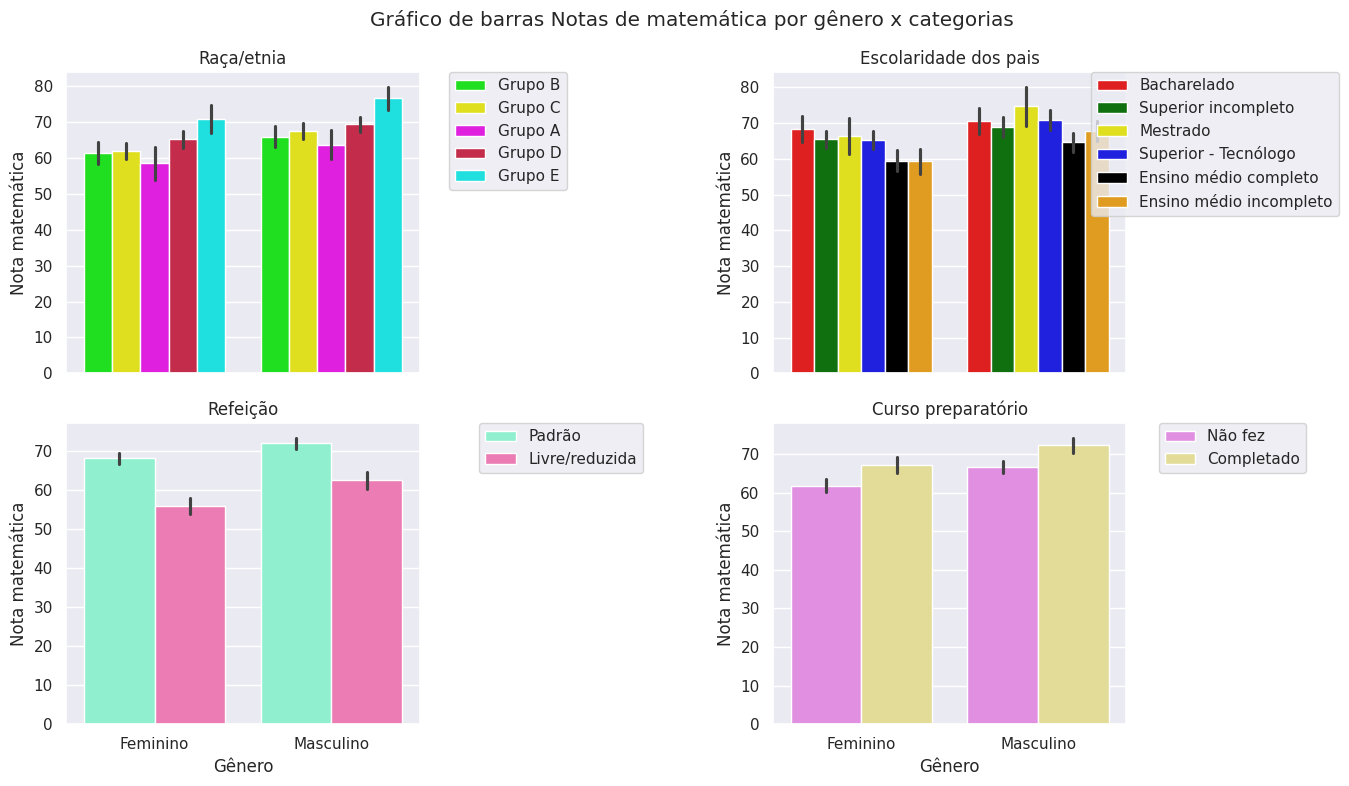

In [ ]:
sns.set(style="darkgrid")
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(14,8))
figure.suptitle('Gráfico de barras Notas de matemática por gênero x categorias')
sns.barplot(ax=axes[0,0], data=dtMath, x='Gênero', y='Nota matemática', hue='Raça/etnia', palette=['lime', 'yellow','magenta','crimson','aqua'])
sns.barplot(ax=axes[0,1], data=dtMath, x='Gênero', y='Nota matemática', hue='Escolaridade dos pais', palette=['red', 'green','yellow','blue','black','orange'])
sns.barplot(ax=axes[1,0], data=dtMath, x='Gênero', y='Nota matemática', hue='Refeição', palette=['aquamarine', 'hotpink'])
sns.barplot(ax=axes[1,1], data=dtMath, x='Gênero', y='Nota matemática', hue='Curso preparatório', palette=['violet', 'khaki'])
axes[0,0].legend(bbox_to_anchor=(1.25, 1), loc='upper center', borderaxespad=0)
axes[0,1].legend(bbox_to_anchor=(1.25, 1), loc='upper center', borderaxespad=0)
axes[1,0].legend(bbox_to_anchor=(1.4, 1), loc='upper center', borderaxespad=0)
axes[1,1].legend(bbox_to_anchor=(1.3, 1), loc='upper center', borderaxespad=0)
axes[0,0].set_title('Raça/etnia')
axes[0,1].set_title('Escolaridade dos pais')
axes[1,0].set_title('Refeição')
axes[1,1].set_title('Curso preparatório')

figure.tight_layout()

**ANÁLISE:** Quando separamos por gênero, a proporção entre meninas e meninos se mantiveram em relação ao gráfico anterior - continuam as mesmas proporções de cada categoria.
A exceção é no gráfico de escolaridade dos pais - meninos com pais com mestrado possuem notas mais altas e com ensino medio as mais baixas. Já as meninas cujos pais possuem bacharelado as notas são mais altas e as mais baixas são daquelas cujos pais possuem ensino médio completo ou incompleto.

Encontrar os outliers

Cálculo de Outliers
Quartil 25% =  57.0
Quartil 75% =  77.0
Pontuação de corte =  30.0
Margem inferior =  27.0
Margem superior =  100
O numero de outliers abaixo da margem inferior é de 8
O numero de outliers acima da margem inferior é de 0
Valores dos outliers =  [18, 0, 22, 24, 26, 19, 23, 8]


<Figure size 1000x600 with 0 Axes>

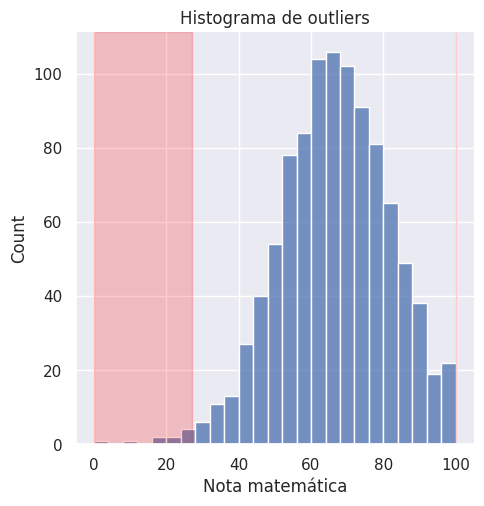

In [ ]:
def encontrar_iqr(dataset, colname):
    #calcular quartis e IQR
    q25 = dataset[colname].quantile(0.25)
    q75 = dataset[colname].quantile(0.75)
    iqr = q75 - q25

    print('Cálculo de Outliers')
    print('Quartil 25% = ',q25)
    print('Quartil 75% = ',q75)

    # calcula outliers fora dos quartis
    cut_off = iqr * 1.5
    print ('Pontuação de corte = ', cut_off)

    # calcula margens inferiores, lower e superiores upper
    lower = q25 - cut_off
    if (lower < 0): #noa mínima [e zero]
      lower = 0
    print('Margem inferior = ', lower)

    upper = q75 + cut_off
    if (upper > 100): #nota máxima é 100
      upper = 100
    print('Margem superior = ', upper)
    lower_outliers = []
    upper_outliers = []

    for i in dataset[colname].values:
      if (i > upper):
        upper_outliers.append(i)
      if (i < lower):
        lower_outliers.append(i)

    print('O numero de outliers abaixo da margem inferior é de {}'.format(len(lower_outliers)))
    print('O numero de outliers acima da margem inferior é de {}'.format(len(upper_outliers)))

    outliers = lower_outliers + upper_outliers
    print('Valores dos outliers = ', outliers)

    return lower, upper, outliers

#gerar gráfico de outliers
lower, upper, outlier =  encontrar_iqr(dtMath, 'Nota matemática')
if (len(outlier) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(dtMath['Nota matemática'], kde=False)
    plt.axvspan(xmin = lower, xmax=dtMath['Nota matemática'].min(), alpha=0.2, color='red')
    plt.axvspan(xmin = upper, xmax=dtMath['Nota matemática'].max(), alpha=0.2, color='red')
    plt.title('Histograma de outliers')



BOXPLOT DOS QUARTIS DAS NOTAS DE MATEMÁTICA

**ANÁLISE:** Podemos perceber que os outliers são notas abaixo de 30 pontos

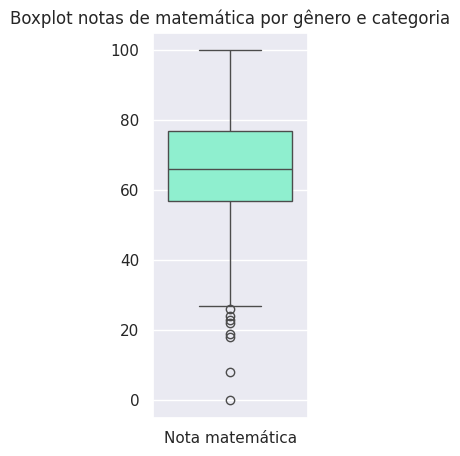

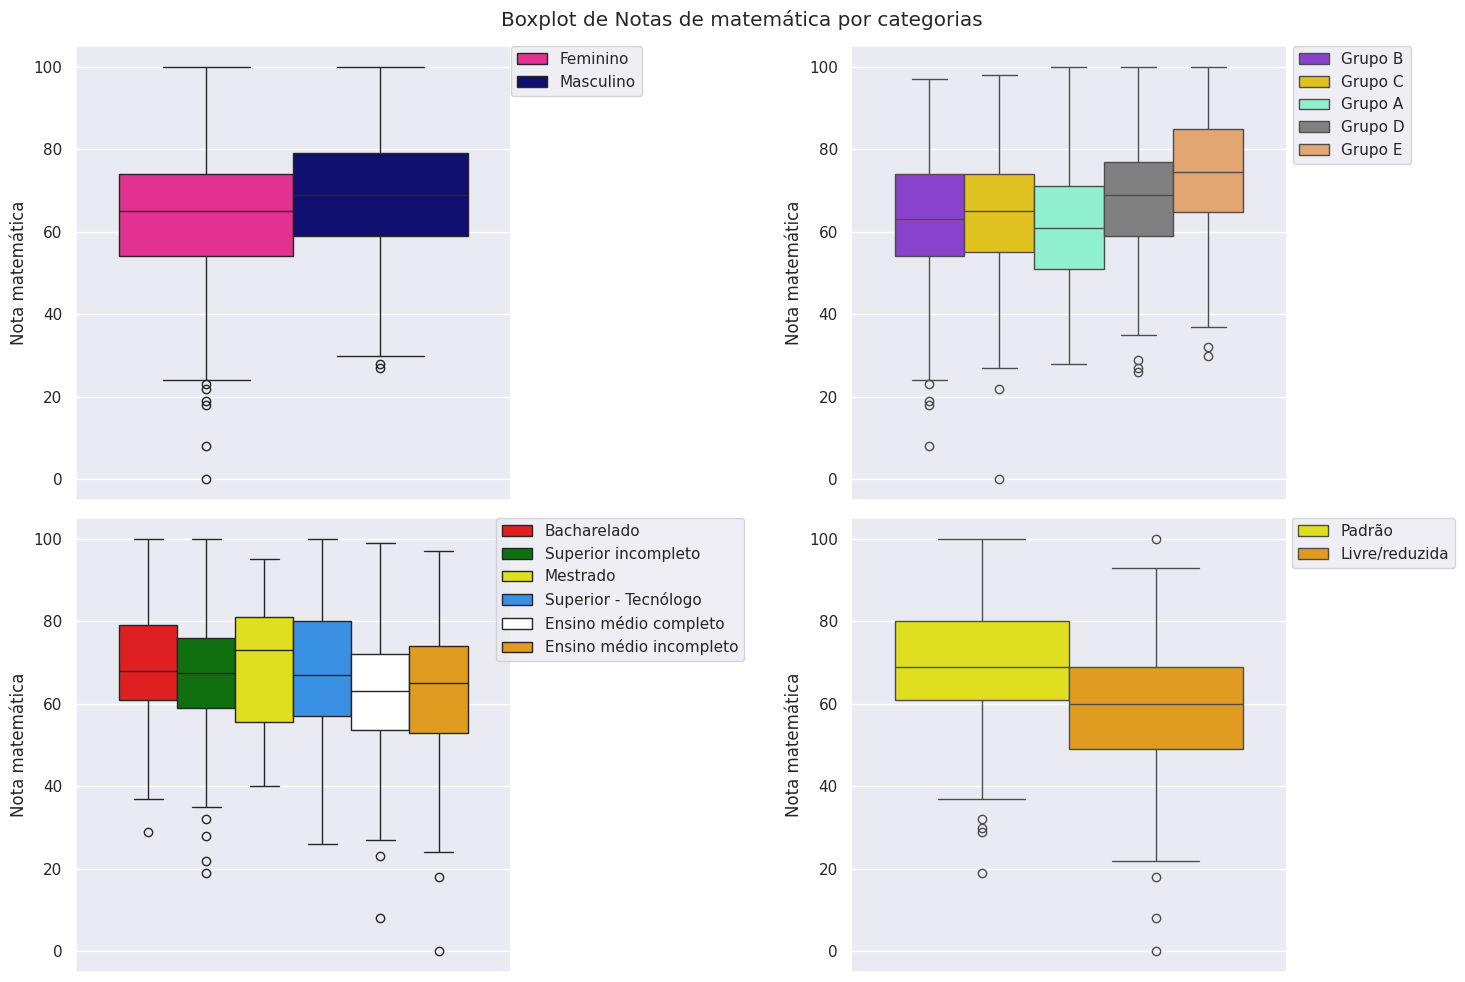

In [ ]:
# Boxplot com os quartis
plt.rcParams['figure.figsize'] = [2, 5]
sns.set_theme()
plt.figure()
sns.boxplot(data = dtMath[['Nota matemática']], color='aquamarine',showfliers=True, orient='v')
plt.title("Boxplot notas de matemática por gênero e categoria")
plt.show()

sns.set(style="darkgrid")
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10))
figure.suptitle('Boxplot de Notas de matemática por categorias')
sns.boxplot(ax=axes[0,0], data=dtMath, hue='Gênero', y='Nota matemática', palette=['deeppink', 'navy'])
axes[0,0].legend(bbox_to_anchor=(1.15, 1), loc='upper center', borderaxespad=0)
sns.boxplot(ax=axes[0,1], data=dtMath, hue='Raça/etnia', y='Nota matemática', palette=['blueviolet', 'gold','aquamarine','gray','sandybrown'])
axes[0,1].legend(bbox_to_anchor=(1.15, 1), loc='upper center', borderaxespad=0)
sns.boxplot(ax=axes[1,0], data=dtMath, hue='Escolaridade dos pais', y='Nota matemática', palette=['red', 'green','yellow','dodgerblue','white','orange'])
axes[1,0].legend(bbox_to_anchor=(1.25, 1), loc='upper center', borderaxespad=0)
sns.boxplot(ax=axes[1,1], data=dtMath, hue='Refeição', y='Nota matemática', palette=['yellow', 'orange'])
axes[1,1].legend(bbox_to_anchor=(1.2, 1), loc='upper center', borderaxespad=0)
figure.tight_layout()

**ANÁLISE:** Existem mais meninas com notas abaixo de 30 pontos do que meninos. A maioria nos grupos étnicos B e C sendo o do grupo C a menor nota. Em relação à esclaridade dos pais, aqueles com pais que só tiveram faculdade incompleta, e ensino médio completo e incompleto possuem mais outliers, porém as notasmais baixas estão nestes dois últimos grupos. Em relação Às refeições, os outliers de notas mais baixas estão naqueles alunos sem refeição/refeição reduzida.

### 6. Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais?


In [ ]:
df_students_copia_matematica.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# NOVA ESTRUTURA PARA RENOMEAR COLUNAS:

new_column_names = {
    'gender': 'Gênero',
    'race/ethnicity': 'Raça/Etnia',
    'parental level of education': 'Grau de Escolaridade dos Pais',
    'lunch': 'Tipo de Almoço',
    'test preparation course': 'Curso Preparatório',
    'math score': 'Nota de Matematica',
    'reading score': 'Nota de Leitura',
    'writing score': 'Nota de Escrita'
}

df_students_copia_matematica = df_students_copia_matematica.rename(columns=new_column_names)

In [ ]:
df_students_copia_matematica.head()

,Gênero,Raça/Etnia,Grau de Escolaridade dos Pais,Tipo de Almoço,Curso Preparatório,Nota de Matematica,Nota de Leitura,Nota de Escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df_students_copia_matematica.dtypes

In [ ]:
# Obtendo ocorrências únicas para o grau de escolaridade com método Pandas
print(df_students_copia_matematica['Grau de Escolaridade dos Pais'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [ ]:
scores_matematica = df_students_copia_matematica.groupby('Grau de Escolaridade dos Pais')['Nota de Matematica'].mean().reset_index()

print(scores_matematica)

  Grau de Escolaridade dos Pais  Nota de Matematica
0            associate's degree           67.882883
1             bachelor's degree           69.389831
2                   high school           62.137755
3               master's degree           69.745763
4                  some college           67.128319
5              some high school           63.497207


In [ ]:
score_medio_matematica = scores_matematica['Nota de Matematica']
lista_score_medio_matematica  = score_medio_matematica.tolist()

In [ ]:
lista_score_medio_matematica

[67.88288288288288,
 69.38983050847457,
 62.13775510204081,
 69.7457627118644,
 67.1283185840708,
 63.497206703910614]

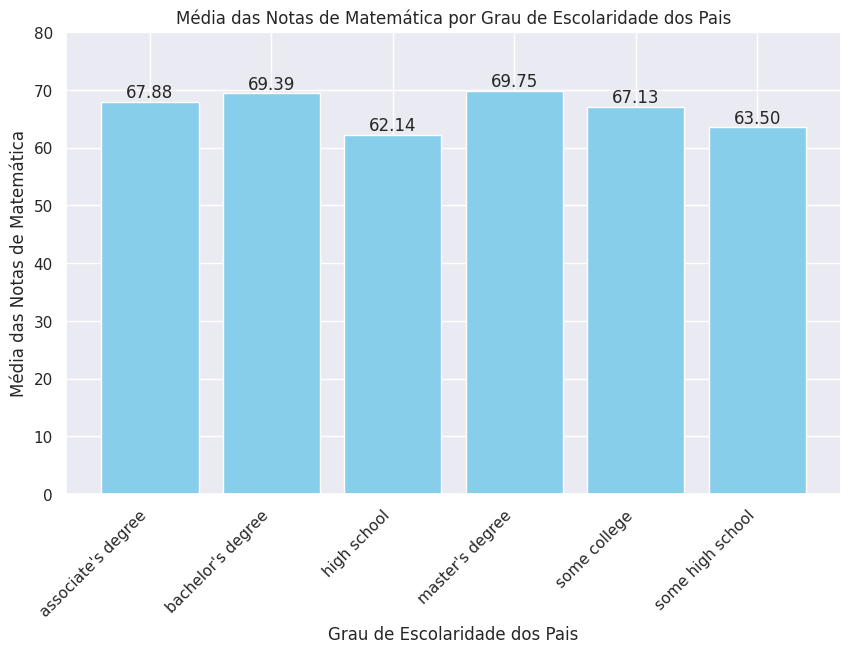

In [ ]:
medias_matematica = scores_matematica['Grau de Escolaridade dos Pais']

# Criando bar plot
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(medias_matematica, lista_score_medio_matematica, color=('skyblue'))

# Ajustando labels e título
plt.xlabel('Grau de Escolaridade dos Pais')
plt.ylabel('Média das Notas de Matemática')
plt.title('Média das Notas de Matemática por Grau de Escolaridade dos Pais')

# Rotacionando o eixo X para melhor leitura
plt.xticks(rotation=45, ha='right')

# Adicionando rótulos às barras
for i, value in enumerate(lista_score_medio_matematica):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Ajustando valor máximo para eixo y
plt.ylim(0, 80)

plt.show()

Analisando as notas de matemática em função do grau de escolaridade dos pais, as **melhores notas (média) são a do grupo de master's degree**. As menores notas (média) são para o grupo de high school.

In [ ]:
medias_matematica = scores_matematica['Grau de Escolaridade dos Pais']

# Find the indices corresponding to "master's degree" and "high school"
master_idx = medias_matematica[medias_matematica == "master's degree"].index[0]
high_school_idx = medias_matematica[medias_matematica == "high school"].index[0]

# Extract the mean math scores for "master's degree" and "high school"
media_score_master = lista_score_medio_matematica[master_idx]
media_score_high_school = lista_score_medio_matematica[high_school_idx]

# Calculate the percentage variation
percent_variation = ((media_score_master - media_score_high_school) / media_score_high_school) * 100

# Display the result
print(f"O percentual de variação entre o nível de master's degree e high school é de {percent_variation:.2f}%")


O percentual de variação entre o nível de master's degree e high school é de 12.24%


Comparando o grupo de melhor desempenho (master's degree) com o de menor desempenho (high school) em matemática, observa-se uma variação de **12,24%** entre as notas médias.

In [ ]:
df_students_copia_matematica = df_students_copia_matematica.copy()

# Criando condição para aprovação em Matemática considerando 70 como linha de corte
df_students_copia_matematica['Aprovados Matemática'] = np.where(df_students_copia_matematica['Nota de Matematica'] >= 70, 'Aprovado', 'Reprovado')

In [ ]:
df_students_copia_matematica.head()

,Gênero,Raça/Etnia,Grau de Escolaridade dos Pais,Tipo de Almoço,Curso Preparatório,Nota de Matematica,Nota de Leitura,Nota de Escrita,Aprovados Matemática
0,female,group B,bachelor's degree,standard,none,72,72,74,Aprovado
1,female,group C,some college,standard,completed,69,90,88,Reprovado
2,female,group B,master's degree,standard,none,90,95,93,Aprovado
3,male,group A,associate's degree,free/reduced,none,47,57,44,Reprovado
4,male,group C,some college,standard,none,76,78,75,Aprovado


In [ ]:
grupo_aprovados_matematica = df_students_copia_matematica.groupby(['Grau de Escolaridade dos Pais', 'Aprovados Matemática']).size().unstack(fill_value=0)

# Calculando o percentual de aprovados para cada grupo
grupo_aprovados_matematica['Percentual de Aprovados'] = (grupo_aprovados_matematica['Aprovado'] / (grupo_aprovados_matematica['Reprovado'] + grupo_aprovados_matematica['Reprovado'])) * 100

print(grupo_aprovados_matematica)

Aprovados Matemática           Aprovado  Reprovado  Percentual de Aprovados
Grau de Escolaridade dos Pais                                              
associate's degree                   98        124                39.516129
bachelor's degree                    56         62                45.161290
high school                          63        133                23.684211
master's degree                      33         26                63.461538
some college                         93        133                34.962406
some high school                     66        113                29.203540


<ipython-input-46-c2b33260119d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Grau de Escolaridade dos Pais', y='Percentual de Aprovados', data=grupo_aprovados_matematica.reset_index(), palette='mako')


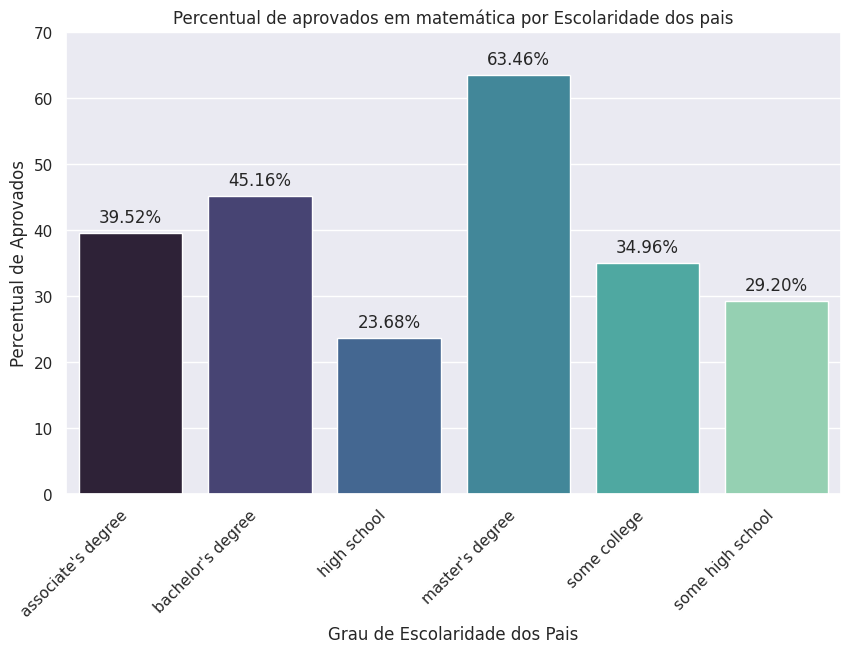

In [ ]:
# Criando bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Grau de Escolaridade dos Pais', y='Percentual de Aprovados', data=grupo_aprovados_matematica.reset_index(), palette='mako')

# Ajustando rótulos e título
bar_plot.set(xlabel='Grau de Escolaridade dos Pais', ylabel='Percentual de Aprovados', title='Percentual de aprovados em matemática por Escolaridade dos pais')

# Rotacionando eixo x para melhor leitura
plt.xticks(rotation=45, ha='right')

# Adicionando rótulos às barras
for index, value in enumerate(grupo_aprovados_matematica['Percentual de Aprovados']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

# Ajustando limite máximo do eixo y para 70
plt.ylim(0, 70)

plt.show()

Enquanto a variação entre as notas foi de 12,24%, quando olhamos para o percentual de alunos aprovados (considerando uma média de no mínimo 70 para aprovação) essa diferença é muito mais agressiva.

**63,46%** de todos os alunos que tem pais com master's degree foram aprovados, porém apenas **23,68%** daqueles que tem pais com high school obtiveram sucesso.

In [ ]:
df_students_copia_matematica['Gênero'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
scores_matematica_genero = df_students_copia_matematica.groupby('Gênero')['Nota de Matematica'].mean().reset_index()

print(scores_matematica_genero)

   Gênero  Nota de Matematica
0  female           63.633205
1    male           68.728216


In [ ]:
scores_matematica_genero = scores_matematica_genero['Nota de Matematica']

# Convertendo a serie em lista
scores_matematica_genero  = scores_matematica_genero.tolist()

In [ ]:
scores_matematica_genero

[63.633204633204635, 68.72821576763485]

In [ ]:
grupo_matematica_genero = df_students_copia_matematica.groupby(['Gênero', 'Aprovados Matemática']).size().unstack(fill_value=0)

# Calculando a porcentagem de ‘Aprovados’ para cada grupo
grupo_matematica_genero['Percentual Aprovado'] = (grupo_matematica_genero['Aprovado'] / (grupo_matematica_genero['Reprovado'] + grupo_matematica_genero['Reprovado'])) * 100

print(grupo_matematica_genero)

Aprovados Matemática  Aprovado  Reprovado  Percentual Aprovado
Gênero                                                        
female                     178        340            26.176471
male                       231        251            46.015936


<ipython-input-52-5bebe8fd5913>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Gênero', y='Percentual Aprovado', data=grupo_matematica_genero.reset_index(), palette='mako')


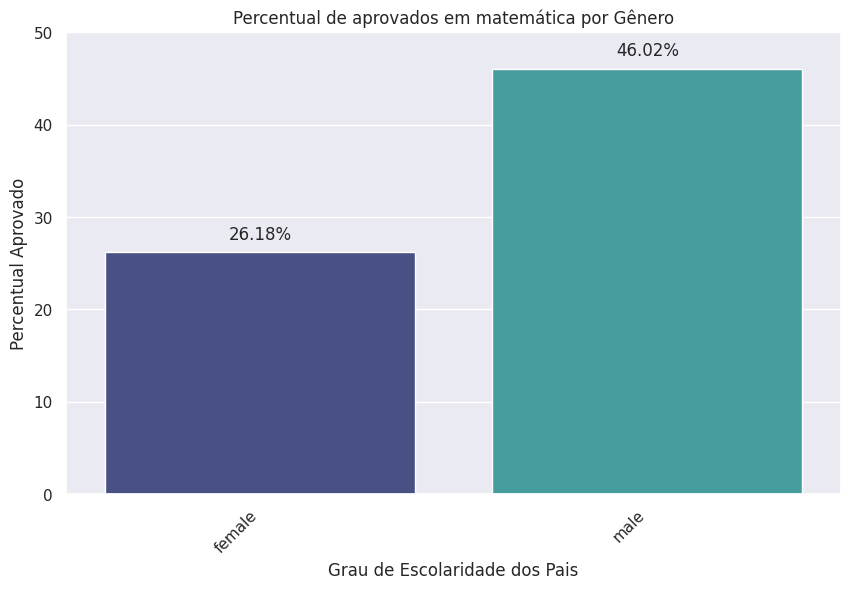

In [ ]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Gênero', y='Percentual Aprovado', data=grupo_matematica_genero.reset_index(), palette='mako')

# Ajustando rótulos e título
bar_plot.set(xlabel='Grau de Escolaridade dos Pais', ylabel='Percentual Aprovado', title='Percentual de aprovados em matemática por Gênero')

# Rotacionando eixo x para melhor leitura
plt.xticks(rotation=45, ha='right')

# Adicionando rótulos às barras
for index, value in enumerate(grupo_matematica_genero['Percentual Aprovado']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

# Ajustando limite máximo do eixo y para 50
plt.ylim(0, 50)

plt.show()

In [ ]:
'''
Com relação ao gênero, **apenas 26,18% das mulheres** foram aprovadas em matemática, enquanto **46,02% dos homens obtiveram sucesso** na disciplina.

'''

'\nCom relação ao gênero, **apenas 26,18% das mulheres** foram aprovadas em matemática, enquanto **46,02% dos homens obtiveram sucesso** na disciplina.\n\n'

### 7. Faça a mesma análise para as notas de leitura e escrita (média)

In [ ]:
#média e mediana das notas de leitura
leitura_media = df_students['Nota de Leitura'].mean().values[0]
leitura_mediana = df_students['Nota de Leitura'].median().values[0]

#média e mediana das notas de escrita
escrita_media = df_students['Nota de Escrita'].mean().values[0]
escrita_mediana = df_students['Nota de Escrita'].median().values[0]

print(f'A média e a mediana da nota de Leitura foi, respecitvamente: {leitura_media:.1f}, {leitura_mediana}')
print(f'A média e a mediana da nota de Escrita foi, respectivamente: {escrita_media:.1f}, {escrita_mediana}')



A média e a mediana da nota de Leitura foi, respecitvamente: 69.2, 70.0
A média e a mediana da nota de Escrita foi, respectivamente: 68.1, 69.0


### 8. Verifique gráficamente a relação da nota de leitura e de escrita. Verifique gráficamente a relação da nota de leitura e de escrita.

Análise notas de leitura

In [ ]:
media_leitura = df_students['Nota de Leitura'].mean().values[0]
moda_leitura = df_students['Nota de Leitura'].mode().values[0]
mediana_leitura = df_students['Nota de Leitura'].median().values[0]
min_leitura = df_students['Nota de Leitura'].min().values[0]
max_leitura = df_students['Nota de Leitura'].max().values[0]
q1_leitura = df_students['Nota de Leitura'].quantile(0.25).values[0]
q3_leitura = df_students['Nota de Leitura'].quantile(0.75).values[0]
iqr_leitura = q3_leitura - q1_leitura
std_leitura = df_students['Nota de Leitura'].std().values[0]

In [ ]:
print(f'A média das notas de leitura é {media_leitura}, a mediana é {mediana_leitura} e a moda é {moda_leitura}.\n\
A nota mínima obtida por um aluno foi de {min_leitura} e a nota máxima foi de {max_leitura}.\n\
A amplitude interquartil é {iqr_leitura}, , indicando a dispersão dos dados. \n\
O primeiro quartil, que representa o valor abaixo do qual 25% das notas estão, foi {q1_leitura}.\n\
O terceiro quartil, que representa o valor abaixo do qual 75% das notas estão, foi {q3_leitura}.\n\
A análise revelou que o desvio padrão das notas de leitura foi de {std_leitura:.2f}.')

A média das notas de leitura é 69.169, a mediana é 70.0 e a moda é [72].
A nota mínima obtida por um aluno foi de 17 e a nota máxima foi de 100.
A amplitude interquartil é 20.0, , indicando a dispersão dos dados. 
O primeiro quartil, que representa o valor abaixo do qual 25% das notas estão, foi 59.0.
O terceiro quartil, que representa o valor abaixo do qual 75% das notas estão, foi 79.0.
A análise revelou que o desvio padrão das notas de leitura foi de 14.60.


Gráficos das Notas de Leitura

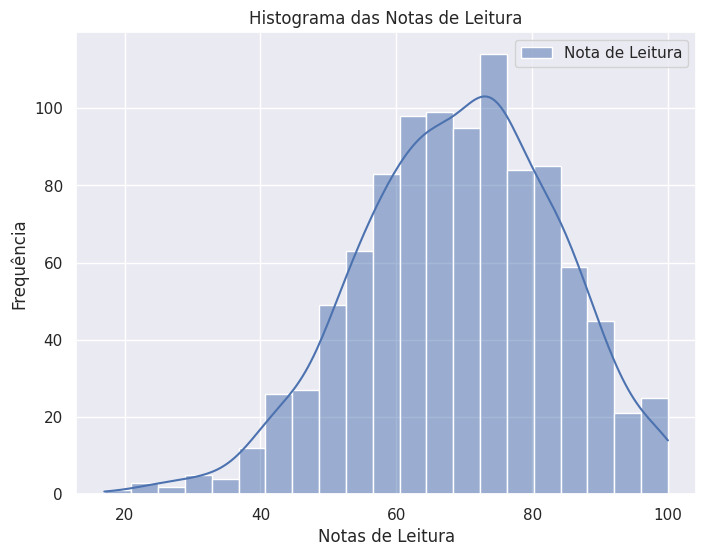

In [ ]:
plt.figure(figsize=(8, 6))

sns.histplot(df_students['Nota de Leitura'], kde=True, color='skyblue')

plt.title('Histograma das Notas de Leitura')
plt.xlabel('Notas de Leitura')
plt.ylabel('Frequência')

plt.show()

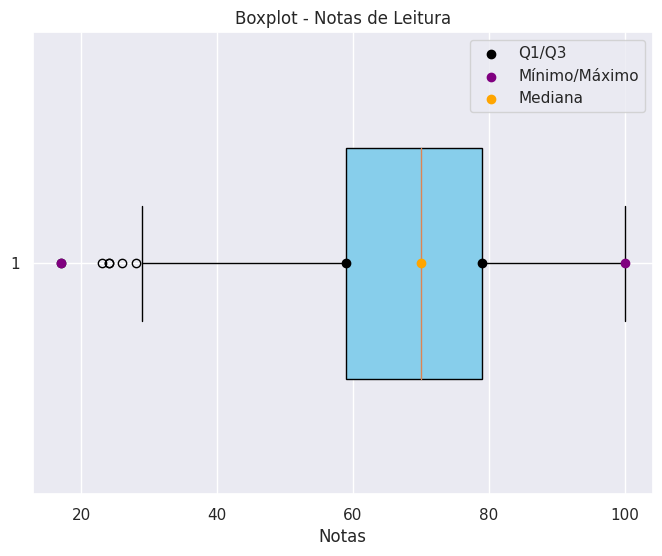

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_students['Nota de Leitura'], vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='skyblue'), whis=1.5)
plt.scatter([q1_leitura, q3_leitura], [1, 1], color='black', label='Q1/Q3', zorder=5)
plt.scatter([min_leitura, max_leitura], [1, 1], color='purple', label='Mínimo/Máximo', zorder=5)
plt.scatter([mediana_leitura], [1], color='orange', label='Mediana', zorder = 5)

plt.xlabel('Notas')
plt.title('Boxplot - Notas de Leitura')
plt.legend()
plt.show()

Análise notas de Escrita

In [ ]:
media_escrita = df_students['Nota de Escrita'].mean().values[0]
moda_escrita= df_students['Nota de Escrita'].mode().values[0]
mediana_escrita = df_students['Nota de Escrita'].median().values[0]
min_escrita = df_students['Nota de Escrita'].min().values[0]
max_escrita = df_students['Nota de Escrita'].max().values[0]
q1_escrita = df_students['Nota de Escrita'].quantile(0.25).values[0]
q3_escrita = df_students['Nota de Escrita'].quantile(0.75).values[0]
iqr_escrita = q3_escrita - q1_escrita
std_escrita = df_students['Nota de Escrita'].std().values[0]

In [ ]:
print(f'A média das notas de escrita é {media_escrita}, a mediana é {mediana_escrita} e a moda é {moda_escrita}.\n\
A nota mínima obtida por um aluno foi de {min_escrita} e a nota máxima foi de {max_escrita}.\n\
A amplitude interquartil é {iqr_escrita}, , indicando a dispersão dos dados. \n\
O primeiro quartil, que representa o valor abaixo do qual 25% das notas estão, foi {q1_escrita}.\n\
O terceiro quartil, que representa o valor abaixo do qual 75% das notas estão, foi {q3_escrita}.\n\
A análise revelou que o desvio padrão das notas de leitura foi de {std_escrita:.2f}, indicando a dispersão dos dados em relação à média.')

A média das notas de escrita é 68.054, a mediana é 69.0 e a moda é [74].
A nota mínima obtida por um aluno foi de 10 e a nota máxima foi de 100.
A amplitude interquartil é 21.25, , indicando a dispersão dos dados. 
O primeiro quartil, que representa o valor abaixo do qual 25% das notas estão, foi 57.75.
O terceiro quartil, que representa o valor abaixo do qual 75% das notas estão, foi 79.0.
A análise revelou que o desvio padrão das notas de leitura foi de 15.20, indicando a dispersão dos dados em relação à média.


Gráficos das Notas de Escrita

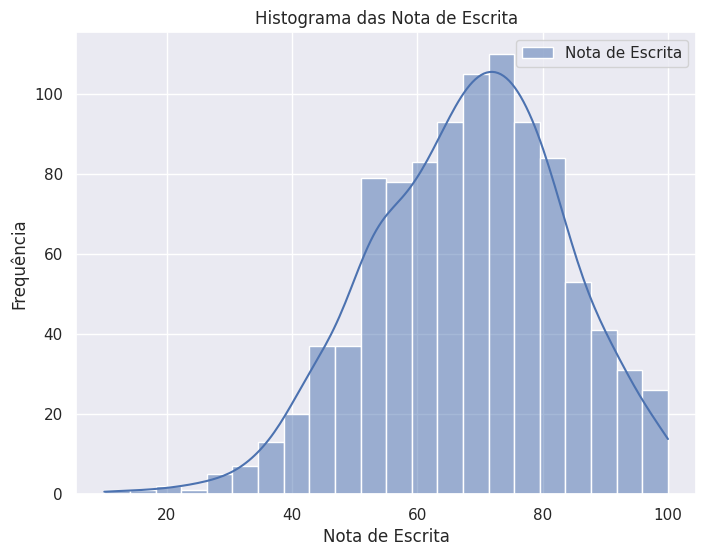

In [ ]:
plt.figure(figsize=(8, 6))

sns.histplot(df_students['Nota de Escrita'], kde=True, color='skyblue')

plt.title('Histograma das Nota de Escrita')
plt.xlabel('Nota de Escrita')
plt.ylabel('Frequência')

plt.show()

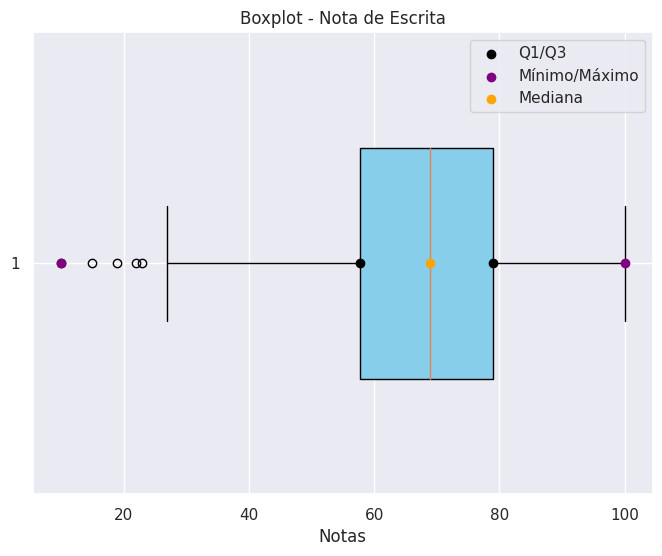

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_students['Nota de Escrita'], vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='skyblue'), whis=1.5)
plt.scatter([q1_escrita, q3_escrita], [1, 1], color='black', label='Q1/Q3', zorder=5)
plt.scatter([min_escrita, max_escrita], [1, 1], color='purple', label='Mínimo/Máximo', zorder=5)
plt.scatter([mediana_escrita], [1], color='orange', label='Mediana', zorder = 5)

plt.xlabel('Notas')
plt.title('Boxplot - Nota de Escrita')
plt.legend()
plt.show()

In [ ]:
# ## **Conclusão: Pode-se observar através dos gráficos que há uma forte correlação entre as notas de leitura e escrita.**

# Atividade extra:
Análise mais algum dado que seja interessante avaliar e represente graficamente, através de boxplot, histogramas, barplot dentre outros diversos de livre escolha.

             Notas   Média
0  Nota matemática  66.089
1     Nota leitura  69.169
2     Nota redação  68.054


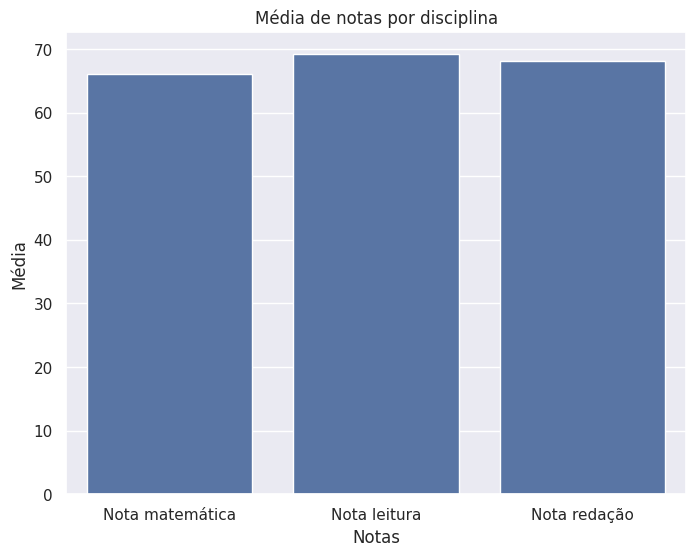

In [ ]:
#obter as médias de cada disciplina num único dataframe
dtNotas = pd.DataFrame({"Notas": ["Nota matemática", "Nota leitura", "Nota redação"], "Média": [dtframe['Nota matemática'].mean(), dtframe['Nota leitura'].mean(), dtframe['Nota redação'].mean()]})
print(dtNotas)

#gráfico comparativo das médias por disciplina
plt.figure(figsize=(8, 6))
sns.barplot(x='Notas', y='Média', data=dtNotas).set(title='Média de notas por disciplina')
plt.show()

In [ ]:
# ### **ANÁLISE**: A disciplina de leitura possui a maior média dentre as três disciplinas

In [ ]:
# **OUTLIERS POR DISCIPLINA**

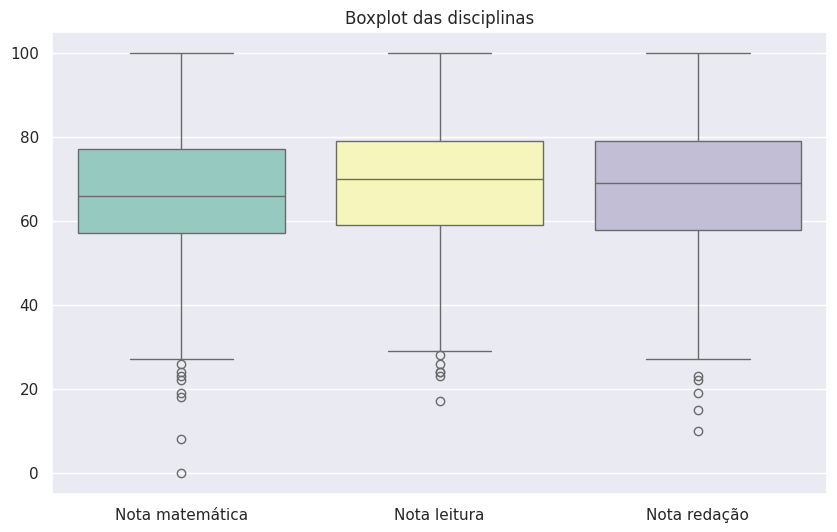

In [ ]:
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = [10, 6]
sns.set_theme()
plt.figure()
sns.boxplot(data = dtframe[['Nota matemática', 'Nota leitura', 'Nota redação']], palette='Set3', showfliers=True, orient='v')
plt.title("Boxplot das disciplinas")
plt.show()


In [ ]:
# **ANÁLISE:** Podemos verificar que existem mais outliers na disciplina de matemática, e também é onde se concentram as notas mais baixas